In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

train_dir = "C:/deep_learning/train"
print(os.listdir(train_dir))

test_dir = "C:/deep_learning/test"
print(os.listdir(test_dir))

val_dir = "C:/deep_learning/val"
print(os.listdir(val_dir))


['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


In [2]:
labels = ['NORMAL', 'PNEUMONIA']


X_train = []
y_train = []

image_size = 224


for i in labels:
    folderPath = os.path.join("C:/deep_learning/train",i)
    class_num = labels.index(i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(class_num)


X_test = []
y_test = []

for i in labels:
    folderPath = os.path.join("C:/deep_learning/test",i)
    class_num = labels.index(i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(class_num)





X_val = []
y_val = []

for i in labels:
    folderPath = os.path.join("C:/deep_learning/val",i)
    class_num = labels.index(i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(image_size,image_size))
        X_val.append(img)
        y_val.append(class_num)








X_train = np.array(X_train).astype("float32")
X_test = np.array(X_test).astype("float32")
X_val = np.array(X_val).astype("float32")

X_train.shape
X_test.shape

X_train = X_train.reshape((-1,image_size,image_size,1)) / 255
X_test = X_test.reshape((-1,image_size,image_size,1)) / 255
X_val = X_val.reshape((-1,image_size,image_size,1)) / 255

y_train = np.array(y_train).astype("int32")
y_test = np.array(y_test).astype("int32")
y_val = np.array(y_val).astype("int32")

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 200.40it/s]


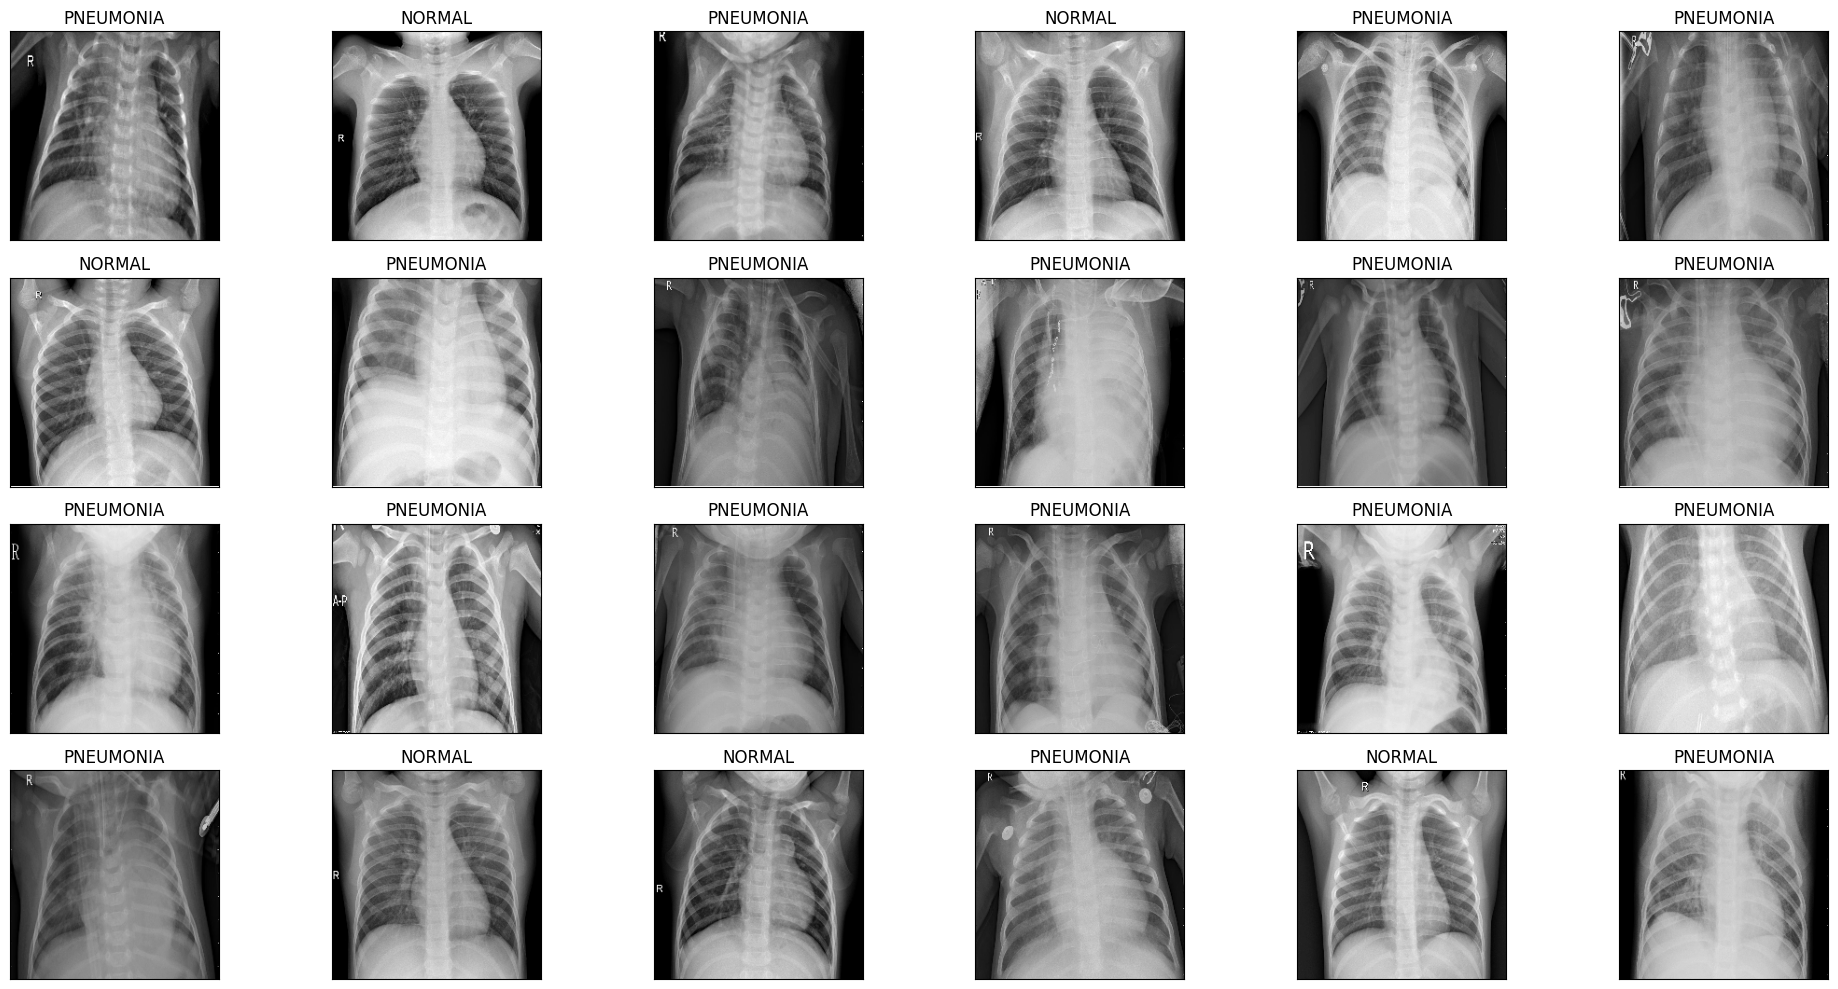

In [3]:
indices = np.random.choice(np.arange(len(X_train)),24,replace=False)
fig, axes = plt.subplots(4,6,figsize=(20,10))

for ax, idx in zip(axes.ravel(), indices):
    ax.imshow(X_train[idx].reshape(image_size, image_size), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(labels[y_train[idx]])

plt.tight_layout()
plt.show()


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout


CNN = Sequential()
CNN.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,1)))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=128,activation='relu',kernel_size=(3,3)))
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Flatten())
CNN.add(Dropout(0.4))

CNN.add(Dense(512,activation="relu"))
CNN.add(Dense(1,activation='sigmoid'))
CNN.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])
history = CNN.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val))
pred = CNN.predict(X_test)
loss,accuracy = CNN.evaluate(X_test,y_test)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 511ms/step - accuracy: 0.8054 - loss: 0.5488 - val_accuracy: 0.8125 - val_loss: 0.3844
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 511ms/step - accuracy: 0.9666 - loss: 0.0985 - val_accuracy: 0.9375 - val_loss: 0.2812
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 516ms/step - accuracy: 0.9681 - loss: 0.0831 - val_accuracy: 0.9375 - val_loss: 0.1827
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 513ms/step - accuracy: 0.9746 - loss: 0.0659 - val_accuracy: 1.0000 - val_loss: 0.0966
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 512ms/step - accuracy: 0.9809 - loss: 0.0536 - val_accuracy: 1.0000 - val_loss: 0.0972
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 513ms/step - accuracy: 0.9776 - loss: 0.0581 - val_accuracy: 1.0000 - val_loss: 0.0503
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 516ms/step - accuracy: 0.9844 - loss: 0.0361 - val_accuracy: 1.0000 - val_loss: 0.0377
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 511ms/step - accuracy: 0.9875 - loss: 0

testing loss:  2.928306818008423
testing accuracy 72.91666865348816


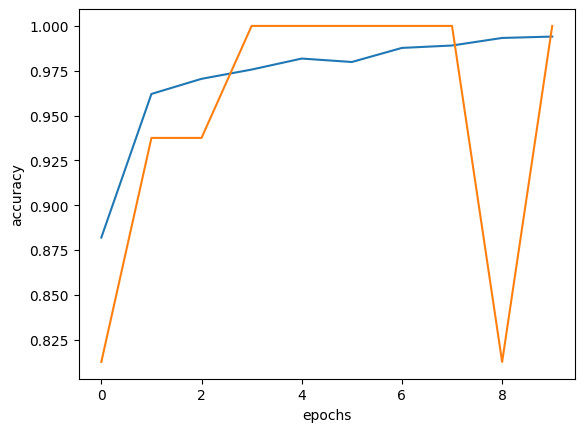

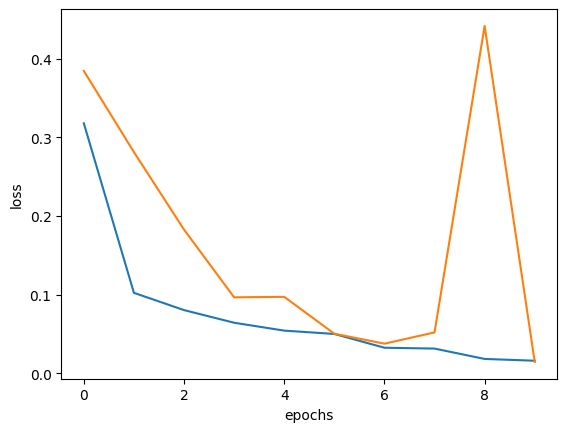

roc auc score: 87.57%


In [9]:
print("testing loss: ",loss)
print("testing accuracy",accuracy*100)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test,pred)
print(f"roc auc score: {roc*100:.2f}%")
